# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/user1/Documents/Project/House_Data.csv')
data

,size,total_sqft,balcony,price
0,2 BHK,1056.0,1.0,39.07
1,4 Bedroom,2600.0,3.0,120.00
2,3 BHK,1991.0,2.0,103.00
3,2 BHK,1060.0,1.0,26.50
4,2 BHK,1105.0,1.0,75.00
...,...,...,...,...
731,4 BHK,2425.0,1.0,195.00
732,4 BHK,2200.0,3.0,80.00
733,3 BHK,1810.0,2.0,112.00
734,2 BHK,1060.0,1.0,52.00


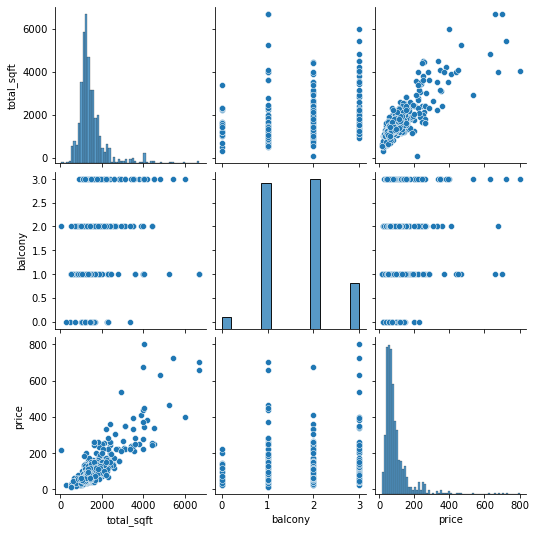

In [3]:
sns.pairplot(data)

In [4]:
data.isna().sum()

size          0
total_sqft    0
balcony       2
price         0
dtype: int64

In [5]:
data['balcony'].fillna("1", inplace = True) 

In [6]:
data['size'].value_counts()

2 BHK        337
3 BHK        298
4 BHK         38
1 BHK         33
4 Bedroom     17
3 Bedroom      8
2 Bedroom      2
7 BHK          1
5 BHK          1
1 RK           1
Name: size, dtype: int64

In [7]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [8]:
data.drop(columns=['size'],inplace = True)

In [9]:
data.head()

,total_sqft,balcony,price,bhk
0,1056.0,1,39.07,2
1,2600.0,3,120.00,4
2,1991.0,2,103.00,3
3,1060.0,1,26.50,2
4,1105.0,1,75.00,2


In [10]:
regression = LinearRegression()
#fit the multiple linear regression
regression.fit(data[['total_sqft','balcony','bhk']],data['price'])

LinearRegression()

In [11]:
# prediction 1
regression.predict([[1200, 2, 2]],)

array([68.39936698])

In [12]:
# cheching accuracy of data
#regression.score(x,y)  x needs to be in 2D array form
regression.score(data[['total_sqft','balcony','bhk']],data['price'])

0.7419821118741381

In [13]:
#checking the coefficient(m1,m2,m3)
regression.coef_

array([  0.11195362,  -1.39059003, -13.43992537])

In [14]:
#check the intercept(b)
regression.intercept_

-36.283943318773964

In [18]:
pd.DataFrame(regression.coef_, ['total_sqft','balcony','bhk'], columns = ['Coeff'])

,Coeff
total_sqft,0.111954
balcony,-1.390590
bhk,-13.439925


In [ ]:
#checking y with equation : y= m1x1 + m2x2 + m3x3 + b
y = 0.11195362*1200 + -1.39059003*2 + -13.43992537*2 + -36.283943318773964
print(y)